## Decision Tree

In [1]:
import mglearn
import matplotlib.pyplot as plt


#mglearn.plots.plot_tree_progressive()

In [2]:
# use breast_cancer dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('training set score: {:.2f}'.format(tree.score(X_train, y_train)))
print('test set score: {:.2f}'.format(tree.score(X_test, y_test)))

training set score: 1.00
test set score: 0.94


As expected, the accuracy on the training set is 100% as the leaves are pure.

Now let’s apply pre-pruning to the tree, which will stop developing the tree before we
perfectly fit to the training data.

One possible way is to stop building the tree after a certain depth has been reached.
Here we set max_depth=4, meaning only four consecutive questions can be asked (cf.
Figure tree_building).

In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

print('training set score: {:.2f}'.format(tree.score(X_train, y_train)))
print('test set score: {:.2f}'.format(tree.score(X_test, y_test)))


training set score: 0.99
test set score: 0.95


Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on
the training set, but an improvement on the test set.

### Analyzing Decision Trees

In [25]:
!pip install graphviz

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x000001F30FE8CF60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/graphviz/


In [ ]:
# Visual the tree using the export_graphviz function from the tree module

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='mytree.dot', class_names=['malignant', 'benign'], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

# We can read this file and visualize it using the graphviz module 
# (or you can use any program that can read dot files):

import graphviz

with open('mytree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance in trees

The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and
1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the
target”.

In [4]:
# The feature importances always sum to one

tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

We can visualize the feature importances in a way that is similar to the way we visualize
the coefficients in the linear model.

In [8]:
cancer.data.shape[1]

30

(0, 1)

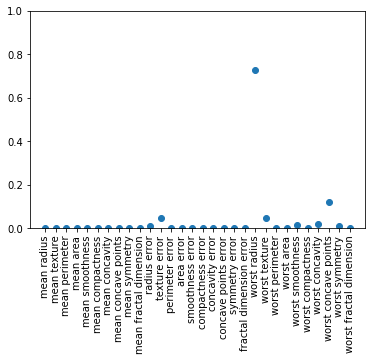

In [9]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0,1)

Here, we see that the feature used at the top split (“worst radius”) is by far the most
important feature. This confirms our observation in analyzing the tree, that the first
level already separates the two classes fairly well.